In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 109s 1us/step


In [3]:
x_train, x_test = x_train/255.0, x_test/255.0

In [4]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
model = models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train,
                   epochs=15,
                   batch_size=64,
                   validation_split=0.2,
                   verbose=2)

Epoch 1/15
625/625 - 27s - 43ms/step - accuracy: 0.4366 - loss: 1.5577 - val_accuracy: 0.5358 - val_loss: 1.3058
Epoch 2/15
625/625 - 25s - 41ms/step - accuracy: 0.5934 - loss: 1.1471 - val_accuracy: 0.5891 - val_loss: 1.1650
Epoch 3/15
625/625 - 41s - 66ms/step - accuracy: 0.6572 - loss: 0.9717 - val_accuracy: 0.6694 - val_loss: 0.9634
Epoch 4/15
625/625 - 41s - 66ms/step - accuracy: 0.6999 - loss: 0.8583 - val_accuracy: 0.6800 - val_loss: 0.9235
Epoch 5/15
625/625 - 40s - 65ms/step - accuracy: 0.7320 - loss: 0.7717 - val_accuracy: 0.7001 - val_loss: 0.8917
Epoch 6/15
625/625 - 25s - 41ms/step - accuracy: 0.7553 - loss: 0.7019 - val_accuracy: 0.7062 - val_loss: 0.8565
Epoch 7/15
625/625 - 25s - 40ms/step - accuracy: 0.7792 - loss: 0.6308 - val_accuracy: 0.7200 - val_loss: 0.8351
Epoch 8/15
625/625 - 26s - 41ms/step - accuracy: 0.7994 - loss: 0.5726 - val_accuracy: 0.7187 - val_loss: 0.8669
Epoch 9/15
625/625 - 25s - 40ms/step - accuracy: 0.8189 - loss: 0.5169 - val_accuracy: 0.7281 - 

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"Test accuracy = {test_acc:.3f}")

Test accuracy = 0.708


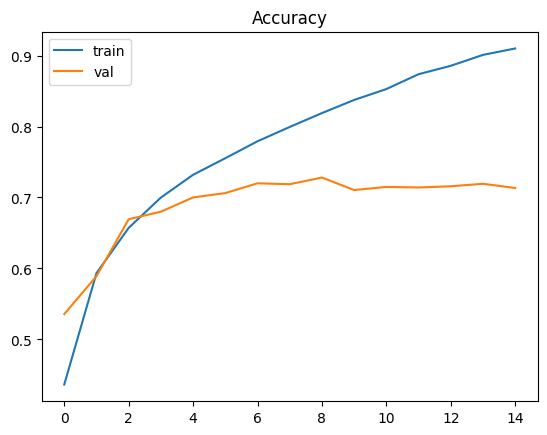

In [8]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.title('Accuracy')
plt.show()